In [2]:
# http://learn.astropy.org/FITS-images.html

In [56]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os 
import glob
from matplotlib.colors import LogNorm
import astroalign as aa

In [4]:
from astropy.utils.data import download_file
from astropy.io import fits

In [5]:
output_dir = "imgs/output/"
data_dir = "imgs/"

In [6]:
image_file = os.path.join(data_dir,'bias/Bias-Darks-002Bias-B1.fit')

In [7]:
hdu_list = fits.open(image_file)

In [8]:
hdu_list.info()

Filename: imgs/bias/Bias-Darks-002Bias-B1.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   (3072, 2048)   int16 (rescales to uint16)   


In [9]:
image_data = hdu_list[0].data

In [10]:
np.std(image_data[1000:2000,100:2000])

13.69348245003102

In [11]:
np.median(image_data[1000:2000,100:2000])

2361.0

In [12]:
np.median(image_data[1000:2000,100:2000])

2361.0

In [13]:
image_data = fits.getdata(image_file)
from matplotlib.colors import LogNorm

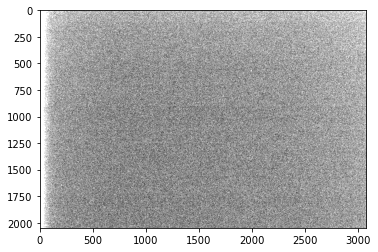

In [14]:
plt.imshow(image_data, cmap='gray', vmin=2350,vmax=2370)


In [15]:
image_list = glob.glob(data_dir+'bias/Bias-Darks-00?Bias-B1.fit')
np.size(image_list)

8

In [16]:
# The long way
image_concat = []
for image in image_list:
    image_concat.append(fits.getdata(image))

In [17]:
image_list

['imgs/bias\\Bias-Darks-002Bias-B1.fit',
 'imgs/bias\\Bias-Darks-003Bias-B1.fit',
 'imgs/bias\\Bias-Darks-004Bias-B1.fit',
 'imgs/bias\\Bias-Darks-005Bias-B1.fit',
 'imgs/bias\\Bias-Darks-006Bias-B1.fit',
 'imgs/bias\\Bias-Darks-007Bias-B1.fit',
 'imgs/bias\\Bias-Darks-008Bias-B1.fit',
 'imgs/bias\\Bias-Darks-009Bias-B1.fit']

In [18]:
final_bias = np.median(image_concat, axis=0)

In [19]:
final_bias.shape

(2048, 3072)

In [20]:
fits.getdata(image).shape

(2048, 3072)

In [21]:
#final_image = np.zeros(shape=image_concat[0].shape)
#for image in image_concat:
#    final_image += image
#final_image = final_image / 10.0 

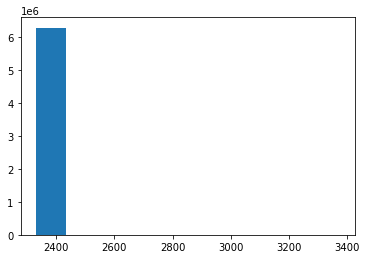

In [22]:
image_hist = plt.hist(final_bias.flatten(), bins=10)

In [23]:
np.std(final_bias[1000:2000,100:2000])

5.654683782752988

In [24]:
np.std(image_data[1000:2000,100:2000])/np.sqrt(8.0)

4.841377149237956

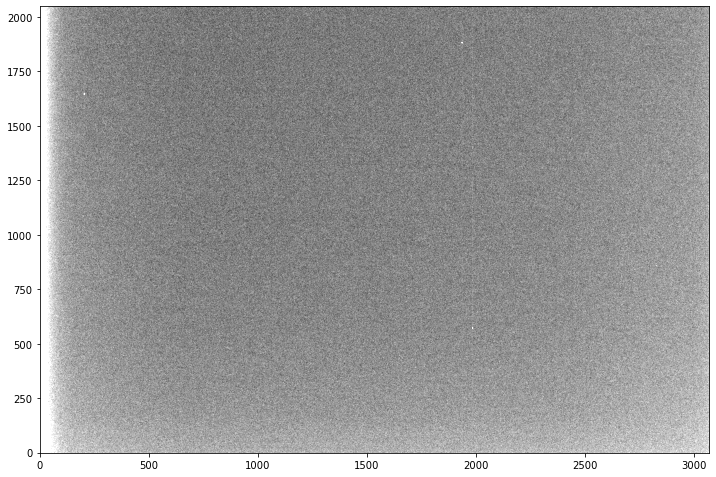

In [77]:
plt.figure(figsize=(12,12))
plt.imshow(final_bias, cmap='gray', vmin=2350,vmax=2370,origin=0)


In [26]:
np.std(final_bias)

6.040243076050436

In [27]:
outfile = output_dir+'median_bias.fits'
hdu = fits.PrimaryHDU(final_bias)
hdu.writeto(outfile, overwrite=True)

In [28]:
#flat_list = glob.glob('/n07data/hjmcc/m1/Flat/H_Alpha/Flat_H_Alpha_45_secs*fits')
#np.size(flat_list)

In [29]:
flat_list = glob.glob(data_dir+'flat/scope_R_1x1_skyflat?.fit')
np.size(flat_list)

10

In [30]:
image_concat = []
for image in flat_list:
    image_concat.append(fits.getdata(image)-final_bias)
# subtract the bias at each step. 

In [31]:
# now get final flat 
flat = np.median(image_concat, axis=0)

In [32]:
final_flat = flat/np.mean(flat) 

In [33]:
final_flat

array([[0.64254565, 0.70928318, 0.69835982, ..., 0.74209527, 0.73167606,
        0.653448  ],
       [0.77179841, 0.83950223, 0.85149692, ..., 0.89819429, 0.88731294,
        0.79240574],
       [0.78583072, 0.85620237, 0.86592836, ..., 0.91762526, 0.89939165,
        0.80669014],
       ...,
       [0.73480603, 0.81448354, 0.81843275, ..., 0.86267236, 0.84935426,
        0.763984  ],
       [0.73239028, 0.79900177, 0.81099646, ..., 0.85576123, 0.83733857,
        0.75316567],
       [0.70646831, 0.7613792 , 0.76242952, ..., 0.80908488, 0.80211073,
        0.72652948]])

In [34]:
np.std(final_flat[1000:2000,100:2000])

0.061979876514167

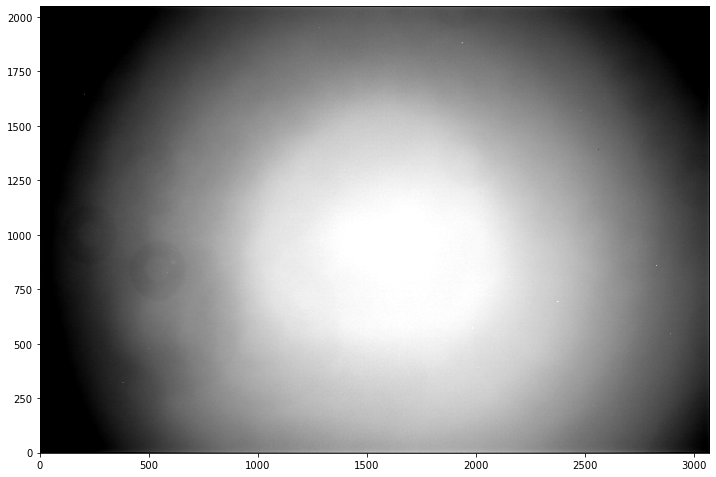

In [75]:
plt.figure(figsize=(12,12))
plt.imshow(final_flat, cmap='gray', vmin=0.9,vmax=1.1,origin=0)


In [64]:
outfile = output_dir+'final_flat.fits'
hdu = fits.PrimaryHDU(final_flat)
hdu.writeto(outfile, overwrite=True)

In [81]:
image_list = glob.glob(data_dir+'science/NGC7293/raw-T30-fetedelascience-NGC7293-*-V-BIN1-W-300-001.fit')
np.size(image_list)

2

In [82]:
import pathlib
#print(pathlib.Path(image).suffix)
filename,file_extension=os.path.splitext(image)
output_dir+os.path.basename(filename)+'_pr.fits'

'imgs/output/raw-T30-fetedelascience-NGC7293-20201127-220733-Ha-BIN1-W-300-001_pr.fits'

In [38]:
image_concat = []
for image in image_list:
#    print(fits.getdata(image).shape)
    processed = (fits.getdata(image)-final_bias)/final_flat
    image_concat.append(processed) 
    filename,file_extension=os.path.splitext(image)
    outfile=output_dir+os.path.basename(filename)+'_pr.fits'
    hdu = fits.PrimaryHDU(processed)
    hdu.writeto(outfile, overwrite=True)
    print(outfile)


imgs/output/Bias-Darks-002Bias-B1_pr.fits
imgs/output/Bias-Darks-003Bias-B1_pr.fits
imgs/output/Bias-Darks-004Bias-B1_pr.fits
imgs/output/Bias-Darks-005Bias-B1_pr.fits
imgs/output/Bias-Darks-006Bias-B1_pr.fits
imgs/output/Bias-Darks-007Bias-B1_pr.fits
imgs/output/Bias-Darks-008Bias-B1_pr.fits
imgs/output/Bias-Darks-009Bias-B1_pr.fits


In [39]:
sci_pr = np.median(image_concat, axis=0)

Median: 0.00 
Std: 0.00


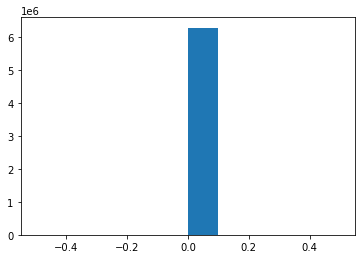

In [40]:
_=plt.hist(sci_pr.flatten(), bins=10)
im_med,im_std = np.median(sci_pr),np.std(sci_pr)
print("Median: {:.2f} \nStd: {:.2f}".format(im_med,im_std))

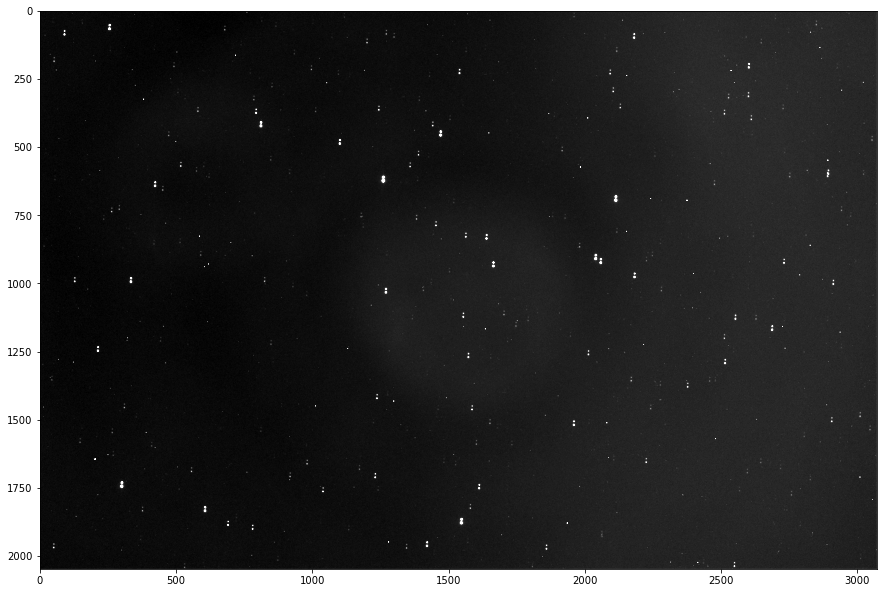

In [86]:
plt.figure(figsize=(15,15))
desvup=5
desvdown=0.5
plt.imshow(sci_pr, cmap='gray', vmin=im_med-desvdown*im_std,vmax=im_med+desvup*im_std)

# --------------------

In [102]:
sci_img_l = fits.open(data_dir+"science/raw-T30-fetedelascience-NGC7293-20201127-215249-R-BIN1-W-300-001.fit")
sci_image_data = fits.getdata(data_dir+"science/NGC7293/raw-T30-fetedelascience-NGC7293-20201127-214654-V-BIN1-W-300-001.fit")

Median: 2237.81 
Std: 374.17


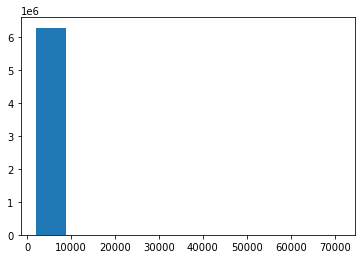

In [103]:
processed_image = (sci_image_data-final_bias)/(final_flat)
_=plt.hist(processed_image.flatten(), bins=10)
im_med,im_std = np.median(processed_image),np.std(processed_image)
print("Median: {:.2f} \nStd: {:.2f}".format(im_med,im_std))

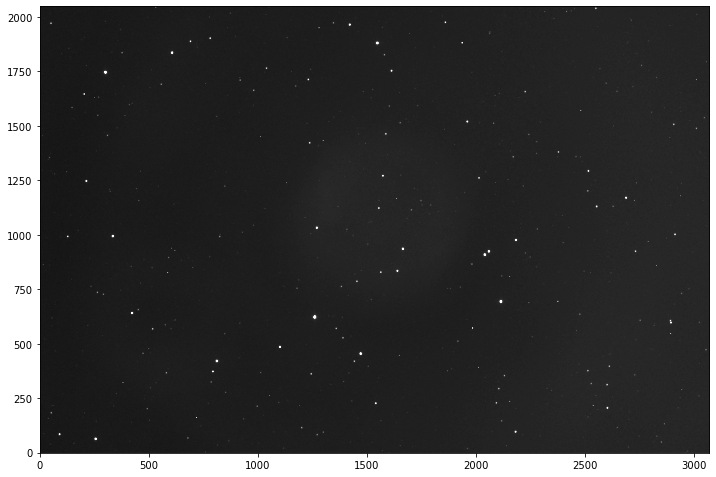

In [109]:
plt.figure(figsize=(12,12))
desvup=10
desvdown=0.8
plt.imshow(processed_image, cmap='gray', vmin=im_med-desvdown*im_std,vmax=im_med+desvup*im_std,norm=LogNorm(),origin=0)

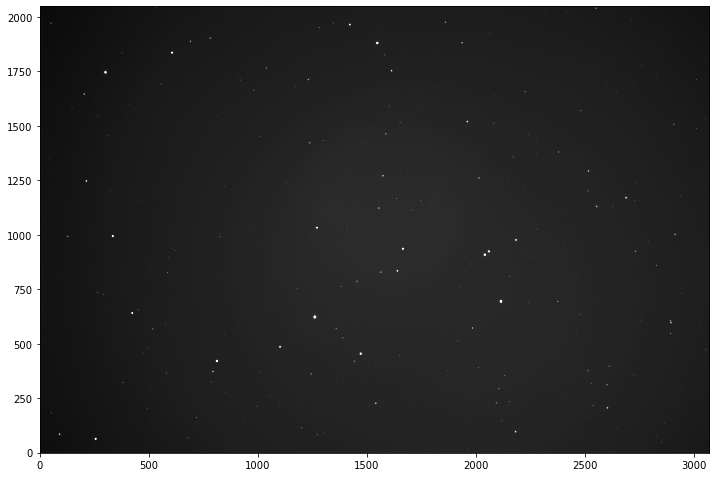

In [113]:
plt.figure(figsize=(12,12))
desvup=4
desvdown=1
plt.imshow(sci_image_data, cmap='gray',vmax=15000,norm=LogNorm(),origin=0)